In [68]:
import os
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image

In [33]:
images, labels = [], []

In [34]:
for i in os.listdir('data'):
    path = os.listdir(os.path.join('data', i))
    for j in path:
        img_path = os.path.join('data', i, j)
        img = cv2.imread(img_path)
        if img is None:
            print('Wrong Path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [35]:
images[0]

array([[[20, 11,  8],
        [17,  8,  5],
        [21, 12,  9],
        ...,
        [23, 12, 13],
        [17, 14,  8],
        [25, 37, 16]],

       [[18,  9,  6],
        [19,  9,  8],
        [21, 11, 11],
        ...,
        [22, 10, 11],
        [20, 17, 11],
        [25, 37, 16]],

       [[17,  7,  6],
        [18,  8,  8],
        [20, 10, 10],
        ...,
        [24, 11, 12],
        [22, 18, 12],
        [26, 37, 17]],

       ...,

       [[16,  9, 10],
        [16,  9, 10],
        [17, 10, 11],
        ...,
        [22,  8, 11],
        [18, 13,  8],
        [23, 33, 16]],

       [[10, 11,  4],
        [ 9, 10,  4],
        [11, 12,  5],
        ...,
        [18, 12, 10],
        [13, 17,  6],
        [18, 35, 13]],

       [[19, 31, 12],
        [19, 30, 12],
        [21, 32, 13],
        ...,
        [25, 33, 14],
        [21, 37, 11],
        [24, 54, 18]]], dtype=uint8)

In [36]:
labels[:10]

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [37]:
print('Number of images in dataset:', len(images))
print('Number of classes in dataset:', len(os.listdir('data')))

Number of images in dataset: 10800
Number of classes in dataset: 9


In [38]:
X, y = shuffle(images, labels)

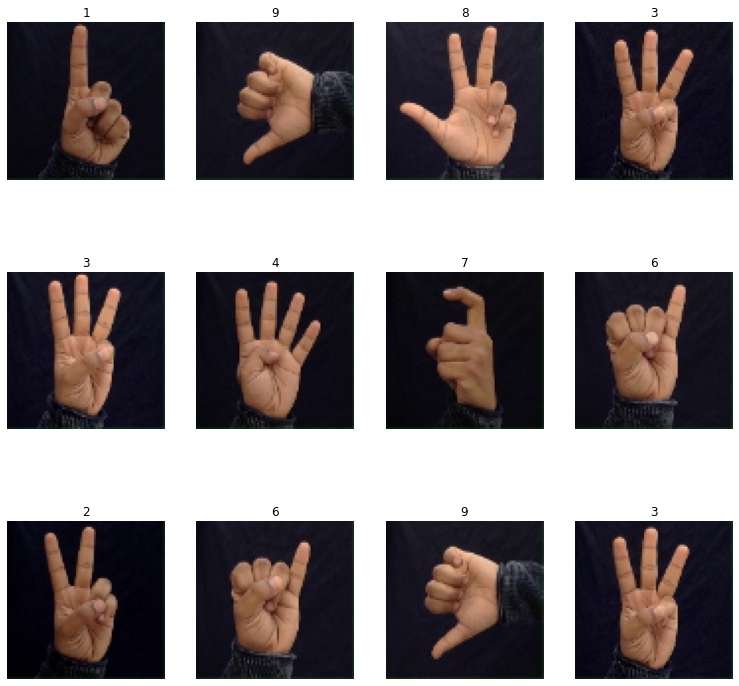

In [39]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    plt.title(y[i])
    plt.axis('off')

In [40]:
df = pd.DataFrame(data = y, columns = ['y'])
df.head()

,y
0,1
1,9
2,8
3,3
4,3


In [41]:
df['y'].value_counts()

y
1    1200
9    1200
8    1200
3    1200
4    1200
7    1200
6    1200
2    1200
5    1200
Name: count, dtype: int64

In [42]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size = 0.2, random_state = 101, stratify = y_le,
                                                    shuffle = True)

In [44]:
print('Number of images in training data:', len(X_train))
print('Number of images in test data:', len(X_test))

Number of images in training data: 8640
Number of images in test data: 2160


In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [46]:
X_train.shape

(8640, 80, 80, 3)

In [47]:
X_test.shape

(2160, 80, 80, 3)

In [48]:
X_train = X_train / 255

In [49]:
X_test = X_test / 255

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'softmax'))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,769 (1.59 MB)

 Trainable params: 415,769 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [54]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [55]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks=[early_stopping])

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.8734 - loss: 0.4181 - val_accuracy: 1.0000 - val_loss: 7.9764e-05
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 2.2106e-06
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 1.3877e-05
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 2.5566e-07
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 9.7271e-08
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 5.3395e-08
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.9160e-07
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step 

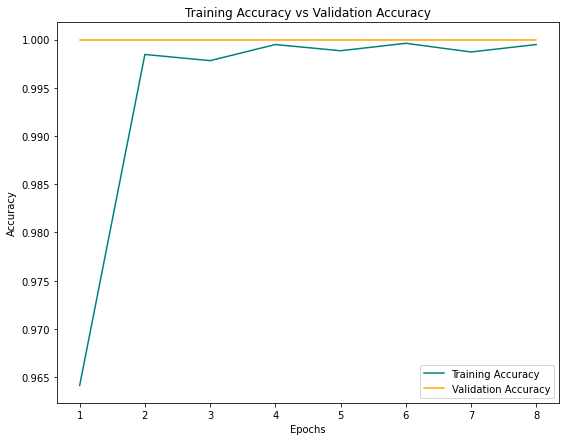

In [57]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

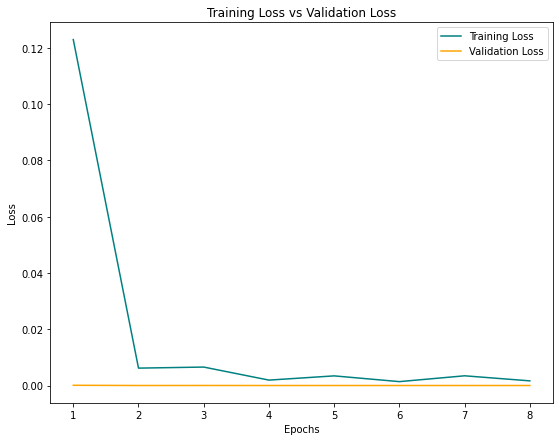

In [59]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss')
plt.xticks([0, 1, 2, 3 , 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
model.evaluate(X_test, y_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 4.0059e-07


[1.1311674796843363e-07, 1.0]

In [63]:
y_p = model.predict(X_test)
y_p[:10]

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


array([[6.37632347e-09, 1.03537647e-27, 1.12187968e-15, 1.98557261e-19,
        6.06565672e-15, 1.18423107e-16, 2.18958070e-16, 1.00000000e+00,
        5.23544240e-18],
       [2.23587659e-09, 5.54964383e-15, 3.40026757e-11, 6.43080644e-10,
        1.18447980e-08, 2.94894595e-11, 7.40745154e-09, 1.33033482e-12,
        1.00000000e+00],
       [5.61059900e-18, 4.05384480e-23, 2.92269507e-11, 1.00000000e+00,
        4.54678375e-14, 2.71210289e-12, 4.91853588e-21, 1.37056555e-12,
        1.31793675e-12],
       [1.49096962e-13, 1.54431006e-13, 1.32149269e-13, 4.26132548e-17,
        2.53781052e-10, 3.13673046e-11, 1.00000000e+00, 1.89036697e-14,
        3.77099706e-11],
       [1.00000000e+00, 9.87028710e-13, 4.81148107e-11, 2.60174456e-12,
        6.26895657e-14, 4.95805071e-16, 8.52976630e-12, 1.45272195e-13,
        2.20773053e-12],
       [1.70854719e-10, 2.70552039e-27, 1.39214464e-14, 8.06780167e-19,
        3.31140619e-14, 3.76489972e-16, 2.63240741e-16, 1.00000000e+00,
        5.2

In [64]:
y_pred = [np.argmax(i) for i in y_p]
y_pred[:10]

[7, 8, 3, 6, 0, 7, 3, 5, 1, 7]

In [65]:
y_test[:10]

array([7, 8, 3, 6, 0, 7, 3, 5, 1, 7], dtype=int64)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       240
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       240

    accuracy                           1.00      2160
   macro avg       1.00      1.00      1.00      2160
weighted avg       1.00      1.00      1.00      2160



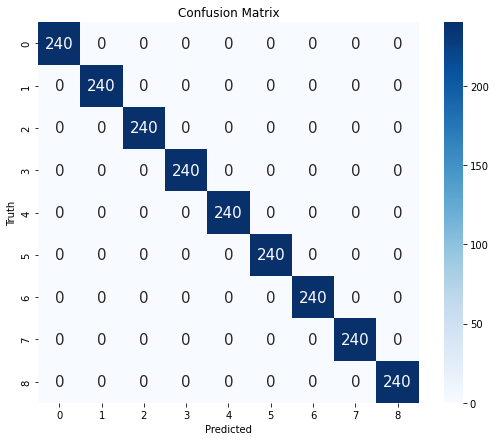

In [67]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()